In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import json
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

### Functions

In [2]:
def draw_elbow(df):
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [3]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [4]:
def drop_cols(data):
    cols = ["sName", "subdistrict", "Natural area", "Metropolitan affiliation", "Founding year", "Organizational affiliation", "Coordinates", "height", "Planning Commission", "Police space", "year", "Cluster Local Authorities"]
    for col in cols:
        data = data.drop(col, axis=1)
        
    return data

In [5]:
def normalize(data):
    lst = []
    for row in data.values:
        summ = 0
        summ += sum(row**2)
        lst.append(row /np.sqrt(summ))
    return lst

In [6]:
def load_from_disk(name):
    try:
        with open(name, 'r') as f:
            tree = json.load(f)
            return tree
    except:
        return None

### Loading relevant data

In [7]:
lbl2word = load_from_disk("generated/generated/lbl2word.json")
word2lbl = load_from_disk("generated/word2lbl.json")
symbol2name = load_from_disk("generated/symbol2name.json")
name2symbol = load_from_disk("generated/name2symbol.json")

In [8]:
index_df = pd.read_excel("info/index 2018heb.xlsx", sheet_name='דת היישוב', header=None, usecols=[0, 1], 
                         names=['באור', 'religion']).dropna()
index_df = index_df.drop(2, axis = 0)
index_df["religion"] = index_df["religion"].astype(float)
index_df

,באור,religion
3,יהודי,1.0
4,לא יהודי,2.0
5,שבט בדווי,3.0
6,ישוב מעורב,4.0


In [9]:
localities = pd.read_excel("info/index 2018heb.xlsx", sheet_name='צורת יישוב', header=None, usecols=[0, 2], 
                         names=['Locality type', 'Current locality type']) #.rename(index={0: 'סמל ישוב'})
localities = localities.iloc[3:,:]
localities = localities.dropna()
print(localities.shape)
localities

(28, 2)


,Locality type,Current locality type
4,"יישובים יהודיים 500,000 תושבים ומעלה",120
5,"יישובים יהודיים 499,999-200,000 תושבים",130
6,"יישובים יהודיים 199,999-100,000 תושבים",140
7,"יישובים יהודיים 99,999-50,000 תושבים",150
8,"יישובים לא יהודיים 99,999-50,000 תושבים",250
9,"יישובים יהודיים 49,999-20,000 תושבים",160
10,"יישובים לא יהודיים 49,999-20,000 תושבים",260
11,"יישובים יהודיים 19,999-10,000 תושבים",170
12,"יישובים לא יהודיים 19,999-10,000 תושבים",270
13,"יישובים יהודיים 9,999-5,000 תושבים",180


In [10]:
expcheb = pd.read_csv("generated/expcheb.csv")

In [11]:
expcheb.head()

,sName,sSymbol,eligble voters,voters,droped,valid,1,2,3,4,...,Arabs,Founding year,Current type of locality,Organizational affiliation,Coordinates,height,Planning Commission,Police space,year,Cluster Local Authorities
0,Tirosh,10,333,237,2,235,0,6,9,0,...,0.0,1955,310,2.0,1.892863e+09,130.0,151.0,15000597.0,2018,0.0
1,Mevasseret Ziyyon,1015,18871,13883,37,13846,0,2161,557,1,...,98.0,1951,160,0.0,2.144363e+09,583.0,152.0,10002475.0,2018,0.0
2,Me'ir Shefeya,102,106,54,0,54,0,11,4,0,...,38.0,1923,340,0.0,1.975772e+09,63.0,303.0,10004333.0,2018,0.0
3,Or Aqiva,1020,15520,9773,72,9701,0,323,499,0,...,93.0,1951,170,0.0,1.927371e+09,10.0,353.0,10004261.0,2018,0.0
4,Haruzim,1024,584,442,3,439,0,72,13,0,...,0.0,1951,350,0.0,1.874468e+09,39.0,401.0,15000060.0,2018,0.0


In [12]:
expcheb2 = pd.read_csv("generated/expcheb2.csv")

In [13]:
expcheb3 = pd.read_csv("generated/expcheb3.csv")

#### merging tables 21 22 23

we decided to merege all the tables together to get a general understanding of the parties and votes over the 3 elections as the the merged data will be used in the clustering algorithms

In [14]:
data = expcheb.append(expcheb2, ignore_index = True).append(expcheb3, ignore_index = True)
data = drop_cols(data)

In [15]:
data.head()

,sSymbol,eligble voters,voters,droped,valid,1,2,3,4,5,...,59,60,district,Municipal status,religion,Total Population 2018,Jews and others,Thereof: Jews,Arabs,Current type of locality
0,10,333,237,2,235,0,6,9,0,0,...,0,0,1,26.0,1.0,501.0,501.0,500.0,0.0,310
1,1015,18871,13883,37,13846,0,2161,557,1,0,...,0,0,1,99.0,1.0,23962.0,23864.0,23114.0,98.0,160
2,102,106,54,0,54,0,11,4,0,0,...,0,0,3,15.0,1.0,286.0,248.0,187.0,38.0,340
3,1020,15520,9773,72,9701,0,323,499,0,0,...,1,0,3,0.0,1.0,18236.0,18143.0,16787.0,93.0,170
4,1024,584,442,3,439,0,72,13,0,0,...,0,0,4,19.0,1.0,866.0,866.0,859.0,0.0,350


## data preprocessing

we decided to group the parties to it's relevant lenaing, the reasoning behind is to the have a more clear view about what the voters, settlement leaning whether be it left, center or right.

In [16]:
## grouping each party to its political idiology and leaning right left or center
groupings = {
                'נ':'Right Leaning', 
                'ז':'Right Leaning',
                'זך':'Right Leaning',
                'ל':'Right Leaning',
                'ג':'Right Leaning', 
                'ףץ':'Right Leaning',
                'קי':'Right Leaning',
                'יץ':'Right Leaning',
                'יז':'Right Leaning',
                'כ':'Right Leaning',
                'מחל':'Right Leaning',
                'זץ':'Right Leaning',
                'טב':'Right Leaning',
                'שס':'Right Leaning',
                'זנ':'Right Leaning',
                'ץ':'Center Leaning',
                'קן':'Center Leaning',
                'נץ':'Center Leaning',
                'קף':'Center Leaning',
                'נר':'Center Leaning',
                'ץי':'Center Leaning',
                'פה':'Center Leaning',
                'זי':'Center Leaning',
                'ףך':'Center Leaning',
                'ךק':'Center Leaning',
                'ן':'Left Leaning',
                'ין':'Left Leaning',
                'ק':'Left Leaning',
                'צק':'Left Leaning',
                'י':'Left Leaning',
                'ףז':'Left Leaning',
                'ףי':'Left Leaning',
                'ןנ':'Left Leaning',
                'נז':'Left Leaning',
                'ןך':'Left Leaning',
                'ףנ':'Left Leaning',
                'ץז':'Left Leaning',
                'ר':'Left Leaning',
                'אמת':'Left Leaning',
                'נך':'Left Leaning',
                'מרצ':'Left Leaning',
                'דעם':'Left Leaning',
                'ום':'Left Leaning'
               }

new_grouping = dict()
for v, k in groupings.items():
    new_grouping[str(word2lbl[v])] = k
    
df = data.groupby(new_grouping, axis = 1).sum() #.reset_index()
data = pd.concat([data.sSymbol, df, data.iloc[:,65:]], axis=1)
del df
data.head()

,sSymbol,Center Leaning,Left Leaning,Right Leaning,district,Municipal status,religion,Total Population 2018,Jews and others,Thereof: Jews,Arabs,Current type of locality
0,10,5.0,6.0,223.0,1,26.0,1.0,501.0,501.0,500.0,0.0,310
1,1015,4316.0,2187.0,7001.0,1,99.0,1.0,23962.0,23864.0,23114.0,98.0,160
2,102,19.0,11.0,22.0,3,15.0,1.0,286.0,248.0,187.0,38.0,340
3,1020,1227.0,356.0,7773.0,3,0.0,1.0,18236.0,18143.0,16787.0,93.0,170
4,1024,180.0,76.0,173.0,4,19.0,1.0,866.0,866.0,859.0,0.0,350


### GMM

In [17]:
gmm = GaussianMixture(n_components=4).fit(data)
labels = gmm.predict(data)

#### Plot by District Number

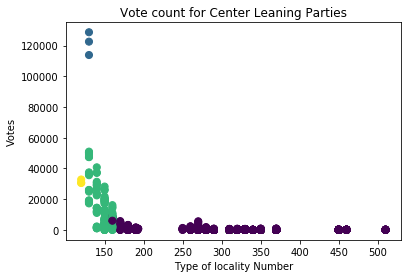

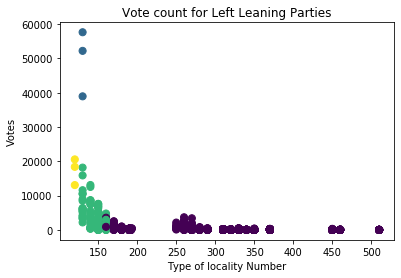

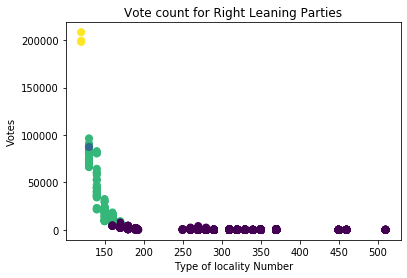

In [18]:
plt.figure(1)
plt.scatter(data["Current type of locality"], data["Center Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Center Leaning Parties')
plt.xlabel('Type of locality Number')
plt.ylabel('Votes')
plt.show()


plt.figure(2)
plt.scatter(data["Current type of locality"], data["Left Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Left Leaning Parties')
plt.xlabel('Type of locality Number')
plt.ylabel('Votes')
plt.show()


plt.figure(3)
plt.scatter(data["Current type of locality"], data["Right Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Right Leaning Parties')
plt.xlabel('Type of locality Number')
plt.ylabel('Votes')
plt.show()


#### Plot by Religion Number

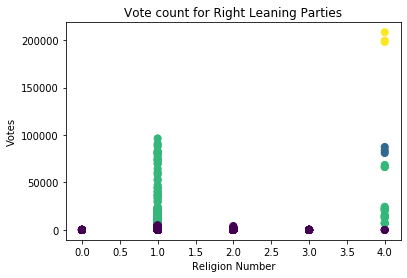

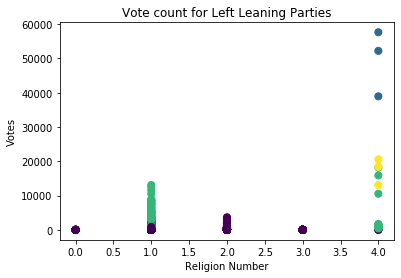

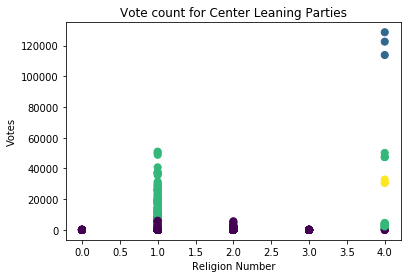

In [19]:
plt.figure(4)
plt.scatter(data["religion"], data["Right Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Right Leaning Parties')
plt.xlabel('Religion Number')
plt.ylabel('Votes')
plt.show()

plt.figure(5)
plt.scatter(data["religion"], data["Left Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Left Leaning Parties')
plt.xlabel('Religion Number')
plt.ylabel('Votes')
plt.show()


plt.figure(6)
plt.scatter(data["religion"], data["Center Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Center Leaning Parties')
plt.xlabel('Religion Number')
plt.ylabel('Votes')
plt.show()


### KMeans

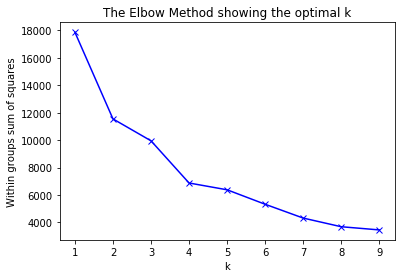

In [20]:
# draw elbow graph to obtain the best possible K
draw_elbow(data)

In [21]:
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(data).predict(data)

#### Plot by District Number

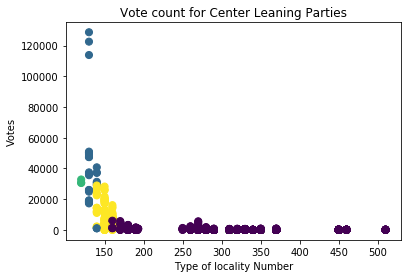

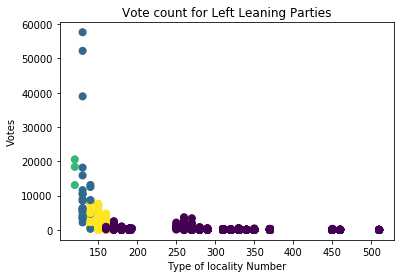

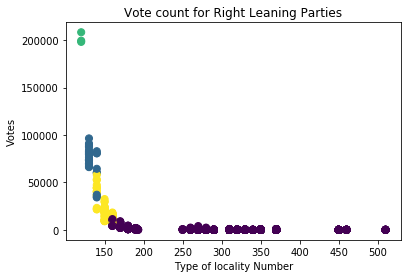

In [22]:
plt.figure(7)
plt.scatter(data["Current type of locality"], data["Center Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Center Leaning Parties')
plt.xlabel('Type of locality Number')
plt.ylabel('Votes')
plt.show()


plt.figure(8)
plt.scatter(data["Current type of locality"], data["Left Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Left Leaning Parties')
plt.xlabel('Type of locality Number')
plt.ylabel('Votes')
plt.show()


plt.figure(9)
plt.scatter(data["Current type of locality"], data["Right Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Right Leaning Parties')
plt.xlabel('Type of locality Number')
plt.ylabel('Votes')
plt.show()

#### Plot by Religion Number

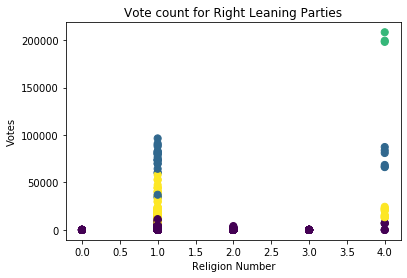

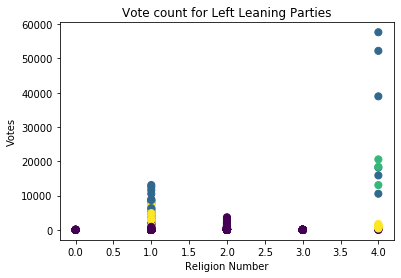

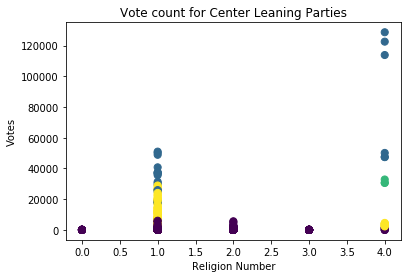

In [23]:
plt.figure(10)
plt.scatter(data["religion"], data["Right Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Right Leaning Parties')
plt.xlabel('Religion Number')
plt.ylabel('Votes')
plt.show()

plt.figure(11)
plt.scatter(data["religion"], data["Left Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Left Leaning Parties')
plt.xlabel('Religion Number')
plt.ylabel('Votes')
plt.show()


plt.figure(12)
plt.scatter(data["religion"], data["Center Leaning"] , c=labels, s=50, cmap='viridis');
plt.title('Vote count for Center Leaning Parties')
plt.xlabel('Religion Number')
plt.ylabel('Votes')
plt.show()


## Observations

1) When observing the left leaning parties graphs we see that they have a much higher vote counts localities types between 250-300, when checking the mapping for the values of localities and their number we can see that they refence none Jewish localities, while right and center leaning parties has gornered more votes from the localities that represnt the Jewish community as the votes distribuion lies between localities of 100-200. 

2) Working with group parties by their leaning instead of invidiual parties produced similar results betwwen Kmeans and GMM. In this case there isn't any preffered model to use between thme especialy when using the elbow method to get the optimal K to try and produce better results.
    
3) When observing the religeon to party leaning graphs we can see that left leaning parties get more votes from releon category 2 which is according to its mapping non-jewish as center and right leaning get more votes from 1, 3, 4 which jewish and Bewim or both